In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("beta.csv",sep=',',decimal=",")

df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))
df = df.set_index("Date").sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2008-01-01 to 2009-05-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17 non-null     int64  
 1   Month   17 non-null     int64  
 2   PTSI    17 non-null     float64
 3   GAZP    17 non-null     float64
 4   SBER    17 non-null     float64
 5   ROSN    17 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 952.0 bytes


In [ ]:
returns = df[["PTSI", "GAZP", "SBER", "ROSN"]].pct_change().dropna()
returns.head()

,PTSI,GAZP,SBER,ROSN
Date,,,,
2008-02-01,0.082314,0.048118,-0.087496,0.139767
2008-03-01,-0.000005,-0.024070,-0.083791,0.077382
2008-04-01,0.028378,0.049998,0.049265,0.094645
2008-05-01,0.158954,0.152325,0.105058,0.240917
2008-06-01,-0.063637,-0.127996,-0.128052,-0.049843


In [8]:
from sklearn.linear_model import LinearRegression

X = returns[["PTSI"]].values  # доходность рынка
results = {}

for stock in ["GAZP", "SBER", "ROSN"]:
    y = returns[stock].values
    
    # Регрессия
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0]
    alpha = model.intercept_
    
    # Ожидаемая доходность и риск
    exp_return = np.mean(y)
    risk = np.std(y, ddof=1)
    
    results[stock] = {
        "alpha": alpha,
        "beta": beta,
        "expected_return": exp_return,
        "risk": risk
    }

results_df = pd.DataFrame(results).T
print(results_df)

         alpha      beta  expected_return      risk
GAZP -0.006172  0.696503        -0.023153  0.139041
SBER  0.007166  1.226126        -0.022727  0.242768
ROSN  0.033818  0.763787         0.015196  0.150207


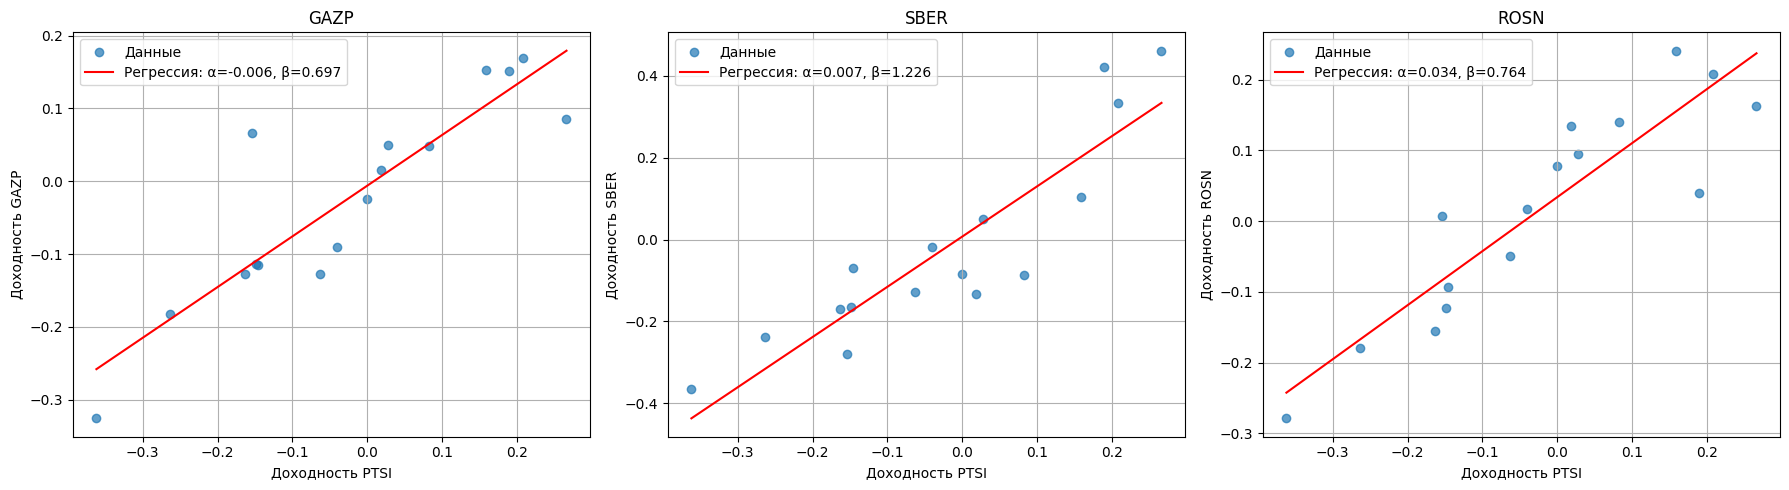

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, stock in zip(axes, ["GAZP", "SBER", "ROSN"]):
    x = returns["PTSI"]
    y = returns[stock]
    beta = results[stock]["beta"]
    alpha = results[stock]["alpha"]
    
    # Диапазон для линии регрессии
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = alpha + beta * x_line
    
    ax.scatter(x, y, alpha=0.7, label='Данные')
    ax.plot(x_line, y_line, color='red', label=f'Регрессия: α={alpha:.3f}, β={beta:.3f}')
    ax.set_xlabel('Доходность PTSI')
    ax.set_ylabel(f'Доходность {stock}')
    ax.set_title(f'{stock}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()